In [1]:
# %load './RREF_real.py'
%matplotlib
from __future__ import division
import random
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()

Using matplotlib backend: Qt4Agg


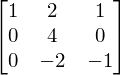

In [5]:
trbl_mkr = Matrix(3,3,[1,2,1,0,4,0,1,0,0])
trbl_mkr
Matrix([[1,0,0],[0,1,0],[-1,0,1]])*Matrix([[1,0,0],[0,1,0],[0,1/2,1]])*trbl_mkr

In [11]:
row_op_storage

⎡⎡1  0  0⎤, ⎡0  1  0⎤, [0  -5/6  0]⎤
⎢⎢       ⎥  ⎢       ⎥              ⎥
⎢⎢0  1  0⎥  ⎢1  0  0⎥              ⎥
⎢⎢       ⎥  ⎢       ⎥              ⎥
⎣⎣0  0  1⎦  ⎣0  0  1⎦              ⎦

> <ipython-input-12-4cdfbcecb990>(44)shortEF()
     43     global row_op_storage
---> 44     pivots = []
     45     cop = mtx.copy()

ipdb> c


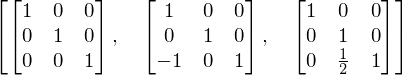

In [13]:
row_op_storage = [eye(3)]
ipdb.runcall(shortEF,trbl_mkr)
row_op_storage

In [26]:
[eye(3)*mtx for mtx in row_op_storage]

⎡⎡1  0  0⎤, ⎡0  1  0⎤, ⎡1  -5/6  0⎤, ⎡1  0  0 ⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢          ⎥  ⎢        ⎥⎥
⎢⎢0  1  0⎥  ⎢1  0  0⎥  ⎢0   1    0⎥  ⎢      11⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢          ⎥  ⎢0  1  ──⎥⎥
⎢⎣0  0  1⎦  ⎣0  0  1⎦  ⎣0   0    1⎦  ⎢      18⎥⎥
⎢                                    ⎢        ⎥⎥
⎣                                    ⎣0  0  1 ⎦⎦

In [34]:
list(row_op_storage[-1][:,0])

[1, 0, 0]

In [12]:
import ipdb
row_op_storage = [eye(3)]
def rolling_rep(mtx,row_starting):
    global row_op_storage
    rep_row = mtx[row_starting,:]
    ret_mat = mtx.copy()
    ret_mat.row_del(row_starting)
    return ret_mat.row_insert(ret_mat.rows,rep_row)

def target_swap(mtx,row,lst):
    global row_op_storage
    ret_mtx = mtx.copy()
    rep_ind = find_nonzero_ind(lst,row)
    stor_rep_row = eye(3)[rep_ind,:] # means take the most recent stored mtx and grab the row from it
    tmp_mtx = eye(3).copy()
    tmp_mtx[rep_ind,:] = eye(3)[row,:]
    tmp_mtx[row,:] = stor_rep_row
    row_op_storage.append(tmp_mtx)
    if rep_ind:
        rep_row = ret_mtx[rep_ind,:]
        ret_mtx[rep_ind,:] = ret_mtx[row,:]
        ret_mtx[row,:] =rep_row
        return ret_mtx
    return False

def find_nonzero_ind(lst,row,backwards=False):
    global row_op_storage
    if backwards:
        lst_to_bool = [x == 0 if i < row else True for i,x in enumerate(lst)]
    else:
        lst_to_bool = [x == 0 if i > row else True for i,x in enumerate(lst)]
    if False not in lst_to_bool:
        return False
    return lst_to_bool.index(False)

def add_mult_row(mtx,piv_row,other):
    global row_op_storage
    return solve(piv_row*x+ other,x)[0]



def shortEF(mtx):
    global row_op_storage
    pivots = []
    cop = mtx.copy()
    row,col = 0,0
    try_cap = cop.rows + 30
    while row < cop.rows and col < cop.cols: #took off -1 from cop.rows mighthave broken stuff
        col_list = list(cop[:,col])
        if try_cap < 0:
            return (row,col)
        if col_list.count(0) == cop.rows or col_list[row:].count(0) > cop.rows -1 -row:
            col +=1
            continue
        if cop[row,col] == 0 :
                #cop = rolling_rep(cop,row)
                cop = target_swap(cop,row,col_list)
                try_cap -=1
                continue
        if col_list[row:].count(0) == cop.rows -1 -row:
            pivots.append((row,col))
            col +=1
            row +=1
            continue
        else:
            
            rep_ind = find_nonzero_ind(col_list,row) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(cop,cop[row,col],cop[rep_ind,col])
            cop[rep_ind,:] += cop[row,:]*multiple_factor
            tmp_mtx = eye(3)
            tmp_mtx[rep_ind,col] += multiple_factor #this will add the correct value to the zero element to make an elementary matrix that can be multiplied with the original matrix to give us the row operation result
            row_op_storage.append(tmp_mtx) # currently this is giving me only a single row, not the whole matrix
    reduce_row(cop,pivots)
    return cop

def reduce_row(mtx,pivot_lst):
    global row_op_storage
    pivot_lst.reverse()
    for row,col in pivot_lst:
        mtx[row,:] = mtx[row,:]/mtx[row,col]
        col_list = list(mtx[:,col])
        while col_list.count(0) < mtx.rows -1:
            rep_ind = find_nonzero_ind(col_list,row,True) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(mtx,mtx[row,col],mtx[rep_ind,col])
            mtx[rep_ind,:] += mtx[row,:]*multiple_factor
            col_list = list(mtx[:,col])

    
## trbl seems to be about two zeros next to each other, fixed by using a check against 


##ipdb.runcall(shortEF,trbl_makr)

In [ ]:
def main ():
    serious_trbl_mkrs = []
    runs = 200
    for i in range(runs):
        trbl_mkr = Matrix(7,8,[random.randrange(1,100) if random.randrange(1,5) < 3 else 0 for num in range(56)])
        if shortEF(trbl_mkr) != trbl_mkr.rref()[0]:
            serious_trbl_mkrs.append(trbl_mkr)

    pprint(serious_trbl_mkrs)
    if len(serious_trbl_mkrs)/runs == 0.0:
        print('no incorrect RREFS')

if __name__ == "__main__":
    main()
    #ipdb.runcall(main)O
    